# regression with neural network

In [1]:
import tensorflow as tf
import numpy as np 
import matplotlib.pyplot as plt

2023-09-13 21:53:02.295734: I tensorflow/core/util/port.cc:110] oneDNN custom operations are on. You may see slightly different numerical results due to floating-point round-off errors from different computation orders. To turn them off, set the environment variable `TF_ENABLE_ONEDNN_OPTS=0`.
2023-09-13 21:53:02.299822: I tensorflow/tsl/cuda/cudart_stub.cc:28] Could not find cuda drivers on your machine, GPU will not be used.
2023-09-13 21:53:02.382834: I tensorflow/tsl/cuda/cudart_stub.cc:28] Could not find cuda drivers on your machine, GPU will not be used.
2023-09-13 21:53:02.384931: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 AVX512F AVX512_VNNI FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
2023-09-13 21:53:04.844375: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Co

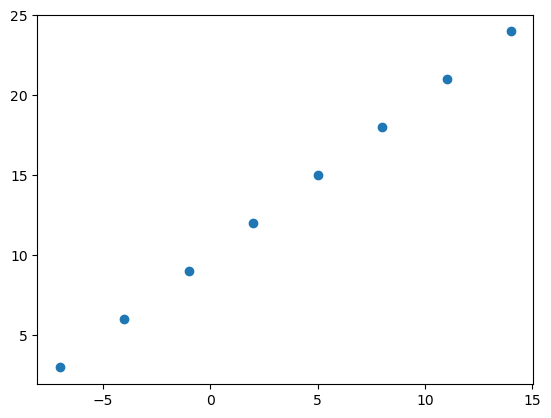

In [2]:
X = np.array([-7., -4., -1., 2., 5., 8., 11., 14.])
y = np.array([3., 6., 9., 12., 15., 18., 21., 24.])
plt.scatter(X,y)

In [3]:
X = X.reshape (-1,1)
y = y.reshape(-1, 1)

In [4]:
house_info = tf.constant(['bedroom', 'bathroom', 'garage'])
house_price = tf.constant([900020])
house_price, house_info

(<tf.Tensor: shape=(1,), dtype=int32, numpy=array([900020], dtype=int32)>,
 <tf.Tensor: shape=(3,), dtype=string, numpy=array([b'bedroom', b'bathroom', b'garage'], dtype=object)>)

In [5]:
X.shape, y.shape

((8, 1), (8, 1))

In [6]:
X = tf.cast(tf.constant(X), dtype = tf.float32)
y = tf.cast(tf.constant(y), dtype = tf.float32)

### steps in modelling with tensorflow 

In [7]:
#!1) creating model
model = tf.keras.Sequential([
    tf.keras.layers.Dense(1)
])

#!2) compile model
model.compile(loss=tf.keras.losses.mae, 
              optimizer=tf.keras.optimizers.SGD(),
              metrics= ["mae"])


#!3) fit the model
model.fit(X, y, epochs = 5)

Epoch 1/5
1/1 [==============================] - 1s 773ms/step - loss: 19.0121 - mae: 19.0121
Epoch 2/5
1/1 [==============================] - 0s 10ms/step - loss: 18.7308 - mae: 18.7308
Epoch 3/5
1/1 [==============================] - 0s 11ms/step - loss: 18.4496 - mae: 18.4496
Epoch 4/5
1/1 [==============================] - 0s 11ms/step - loss: 18.1683 - mae: 18.1683
Epoch 5/5
1/1 [==============================] - 0s 9ms/step - loss: 17.8871 - mae: 17.8871


In [8]:
model.predict([[6]])


1/1 [==============================] - 0s 185ms/step


array([[-5.544174]], dtype=float32)

improve the model

In [9]:
# imporving using epochs

model.fit(X,y, epochs = 100)

Epoch 1/100
1/1 [==============================] - 0s 14ms/step - loss: 17.6058 - mae: 17.6058
Epoch 2/100
1/1 [==============================] - 0s 10ms/step - loss: 17.3246 - mae: 17.3246
Epoch 3/100
1/1 [==============================] - 0s 10ms/step - loss: 17.0433 - mae: 17.0433
Epoch 4/100
1/1 [==============================] - 0s 11ms/step - loss: 16.7621 - mae: 16.7621
Epoch 5/100
1/1 [==============================] - 0s 12ms/step - loss: 16.4808 - mae: 16.4808
Epoch 6/100
1/1 [==============================] - 0s 15ms/step - loss: 16.1996 - mae: 16.1996
Epoch 7/100
1/1 [==============================] - 0s 12ms/step - loss: 15.9183 - mae: 15.9183
Epoch 8/100
1/1 [==============================] - 0s 10ms/step - loss: 15.6371 - mae: 15.6371
Epoch 9/100
1/1 [==============================] - 0s 12ms/step - loss: 15.3558 - mae: 15.3558
Epoch 10/100
1/1 [==============================] - 0s 10ms/step - loss: 15.0746 - mae: 15.0746
Epoch 11/100
1/1 [==============================]

1/1 [==============================] - 0s 20ms/step - loss: 10.3010 - mae: 10.3010
Epoch 46/100
1/1 [==============================] - 0s 19ms/step - loss: 10.1685 - mae: 10.1685
Epoch 47/100
1/1 [==============================] - 0s 14ms/step - loss: 10.0360 - mae: 10.0360
Epoch 48/100
1/1 [==============================] - 0s 11ms/step - loss: 9.9035 - mae: 9.9035
Epoch 49/100
1/1 [==============================] - 0s 11ms/step - loss: 9.7710 - mae: 9.7710
Epoch 50/100
1/1 [==============================] - 0s 10ms/step - loss: 9.6385 - mae: 9.6385
Epoch 51/100
1/1 [==============================] - 0s 15ms/step - loss: 9.5060 - mae: 9.5060
Epoch 52/100
1/1 [==============================] - 0s 16ms/step - loss: 9.3735 - mae: 9.3735
Epoch 53/100
1/1 [==============================] - 0s 16ms/step - loss: 9.2410 - mae: 9.2410
Epoch 54/100
1/1 [==============================] - 0s 14ms/step - loss: 9.1085 - mae: 9.1085
Epoch 55/100
1/1 [==============================] - 0s 11ms/step - 

In [10]:
model.predict([[17.]])

1/1 [==============================] - 0s 126ms/step


array([[29.747753]], dtype=float32)

In [11]:
## using hidden neurons and optimizers
model = tf.keras.Sequential([
    tf.keras.layers.Dense(100, activation= None),
    tf.keras.layers.Dense(1)
])

#!2) compile model
model.compile(loss=tf.keras.losses.mae, 
              optimizer=tf.keras.optimizers.Adam(learning_rate = 0.01),
              metrics= ["mae"])


#!3) fit the model
model.fit(X, y, epochs = 100)

Epoch 1/100
1/1 [==============================] - 1s 1s/step - loss: 13.4172 - mae: 13.4172
Epoch 2/100
1/1 [==============================] - 0s 11ms/step - loss: 12.4250 - mae: 12.4250
Epoch 3/100
1/1 [==============================] - 0s 9ms/step - loss: 11.4257 - mae: 11.4257
Epoch 4/100
1/1 [==============================] - 0s 12ms/step - loss: 10.4151 - mae: 10.4151
Epoch 5/100
1/1 [==============================] - 0s 12ms/step - loss: 9.3883 - mae: 9.3883
Epoch 6/100
1/1 [==============================] - 0s 9ms/step - loss: 8.3401 - mae: 8.3401
Epoch 7/100
1/1 [==============================] - 0s 8ms/step - loss: 7.2641 - mae: 7.2641
Epoch 8/100
1/1 [==============================] - 0s 8ms/step - loss: 6.7478 - mae: 6.7478
Epoch 9/100
1/1 [==============================] - 0s 10ms/step - loss: 7.3274 - mae: 7.3274
Epoch 10/100
1/1 [==============================] - 0s 12ms/step - loss: 7.9784 - mae: 7.9784
Epoch 11/100
1/1 [==============================] - 0s 7ms/step - l

In [12]:
model.predict([[17]])

1/1 [==============================] - 0s 143ms/step


array([[27.734434]], dtype=float32)

evaluvating the model

In [13]:
X = tf.cast(tf.range (-100, 100, 4), dtype= tf.float32)
X.dtype

tf.float32

In [14]:
y = X + 10
y

<tf.Tensor: shape=(50,), dtype=float32, numpy=
array([-90., -86., -82., -78., -74., -70., -66., -62., -58., -54., -50.,
       -46., -42., -38., -34., -30., -26., -22., -18., -14., -10.,  -6.,
        -2.,   2.,   6.,  10.,  14.,  18.,  22.,  26.,  30.,  34.,  38.,
        42.,  46.,  50.,  54.,  58.,  62.,  66.,  70.,  74.,  78.,  82.,
        86.,  90.,  94.,  98., 102., 106.], dtype=float32)>

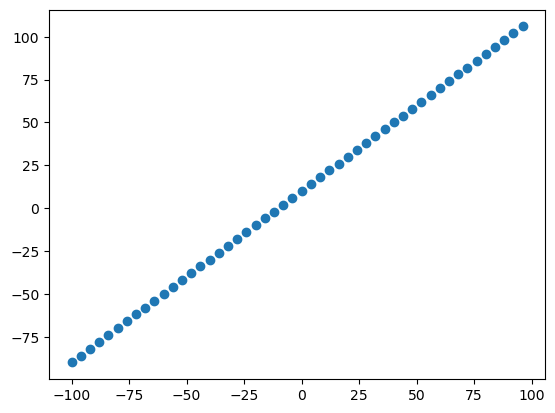

In [15]:
plt.scatter(X,y)

In [16]:
len(X)

50

In [17]:
X_train =  X [:40]
X_test =  X [40:]
y_train =  y [:40]
y_test =  y [40:]

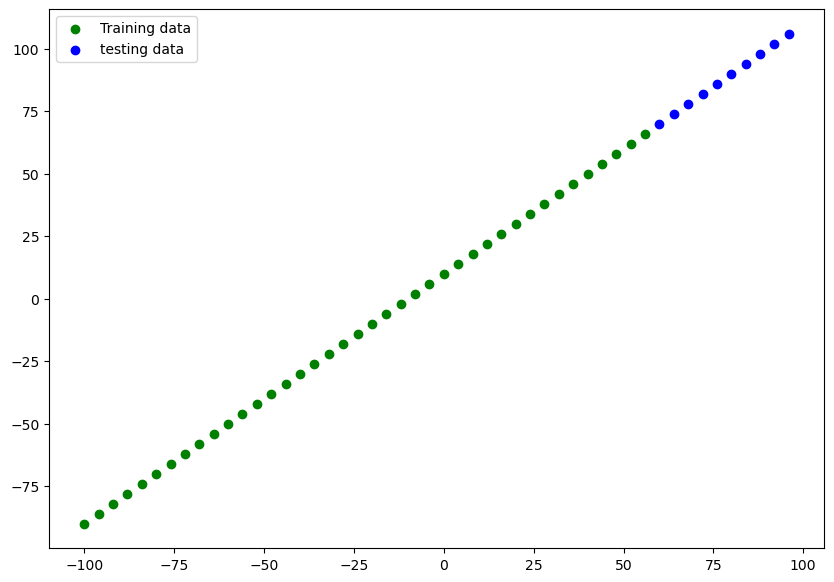

In [18]:
plt.figure(figsize = (10,7))
plt.scatter(X_train , y_train, c = "g", label = "Training data")
plt.scatter(X_test , y_test, c = "b", label = "testing data")
plt.legend();

In [19]:
X[0].shape

TensorShape([])

In [20]:
model = tf.keras.Sequential([
    tf.keras.layers.Dense(10, input_shape = [1], name = "input_layer"),
  
    tf.keras.layers.Dense(1, name = "output_layer")
], name = "model")


model.compile(loss = tf.keras.losses.mae,
            optimizer= tf.keras.optimizers.SGD(), 
            metrics=['accuracy']
            )


model.fit(X_train, y_train, epochs = 50, verbose= 0)  # if set 1 it will show model training like a progress bar

In [21]:
model.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_layer (Dense)         (None, 10)                20        
                                                                 
 output_layer (Dense)        (None, 1)                 11        
                                                                 
Total params: 31 (124.00 Byte)
Trainable params: 31 (124.00 Byte)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


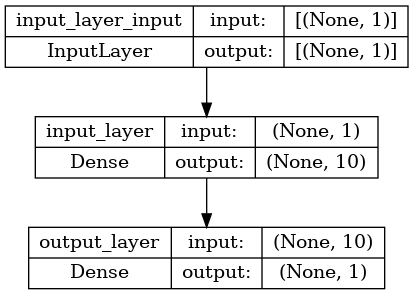

In [22]:
from tensorflow.keras.utils import plot_model
plot_model(model = model, show_shapes = True)

visualize model predictions

In [23]:
y_pred = model.predict(X_test)
y_pred

1/1 [==============================] - 0s 62ms/step


array([[46.60558 ],
       [49.652946],
       [52.700314],
       [55.747677],
       [58.795048],
       [61.842415],
       [64.88978 ],
       [67.93715 ],
       [70.98451 ],
       [74.031876]], dtype=float32)

In [24]:
y_test

<tf.Tensor: shape=(10,), dtype=float32, numpy=
array([ 70.,  74.,  78.,  82.,  86.,  90.,  94.,  98., 102., 106.],
      dtype=float32)>

In [25]:
def plot_predictions(train_data = X_train, train_labels = y_train ,test_data = X_test, test_labels = y_test, prdeictions = y_pred):
    plt.figure(figsize=(10,6))
    plt.scatter(train_data, train_labels, c = "b", label = "Traning data")
    plt.scatter(test_data, test_labels, c = "g", label = "Testing data")
    plt.scatter(test_data, prdeictions, c = 'r', label = "predictions")
    plt.legend()

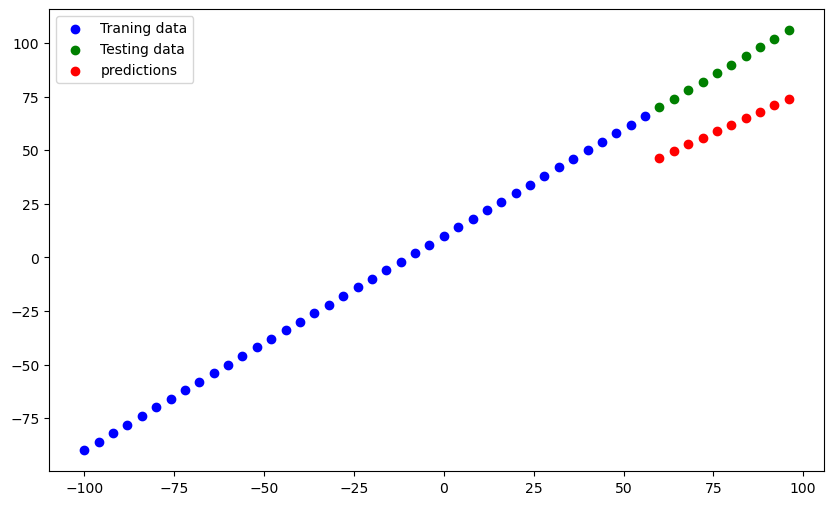

In [26]:
plot_predictions()

### evaluvating using regression evaluation mertics

In [27]:
model.evaluate(X_test, y_test)

1/1 [==============================] - 0s 151ms/step - loss: 27.6813 - accuracy: 0.0000e+00


[27.6812686920166, 0.0]

In [28]:
y_pred, y_test


(array([[46.60558 ],
        [49.652946],
        [52.700314],
        [55.747677],
        [58.795048],
        [61.842415],
        [64.88978 ],
        [67.93715 ],
        [70.98451 ],
        [74.031876]], dtype=float32),
 <tf.Tensor: shape=(10,), dtype=float32, numpy=
 array([ 70.,  74.,  78.,  82.,  86.,  90.,  94.,  98., 102., 106.],
       dtype=float32)>)

In [29]:
y_pred = tf.squeeze(y_pred)

In [30]:
mae = tf.metrics.mean_absolute_error(y_test, y_pred)
mae 

<tf.Tensor: shape=(), dtype=float32, numpy=27.681269>

In [31]:
mse = tf.metrics.mean_squared_error(y_test, y_pred)
mse

<tf.Tensor: shape=(), dtype=float32, numpy=773.7397>

In [32]:
huber = tf.keras.losses.Huber(delta= 1)
huber(y_test, y_pred)

<tf.Tensor: shape=(), dtype=float32, numpy=27.181269>

In [33]:
def Mae(y_true, y_pred):
    return tf.keras.losses.mae(y_true, tf.squeeze(y_pred))
def mse(y_true, y_pred):
    return tf.keras.losses.mse(y_true, tf.squeeze(y_pred))

In [34]:
X_train, y_train

(<tf.Tensor: shape=(40,), dtype=float32, numpy=
 array([-100.,  -96.,  -92.,  -88.,  -84.,  -80.,  -76.,  -72.,  -68.,
         -64.,  -60.,  -56.,  -52.,  -48.,  -44.,  -40.,  -36.,  -32.,
         -28.,  -24.,  -20.,  -16.,  -12.,   -8.,   -4.,    0.,    4.,
           8.,   12.,   16.,   20.,   24.,   28.,   32.,   36.,   40.,
          44.,   48.,   52.,   56.], dtype=float32)>,
 <tf.Tensor: shape=(40,), dtype=float32, numpy=
 array([-90., -86., -82., -78., -74., -70., -66., -62., -58., -54., -50.,
        -46., -42., -38., -34., -30., -26., -22., -18., -14., -10.,  -6.,
         -2.,   2.,   6.,  10.,  14.,  18.,  22.,  26.,  30.,  34.,  38.,
         42.,  46.,  50.,  54.,  58.,  62.,  66.], dtype=float32)>)

In [35]:
tf.random.set_seed(32)
model1 = tf.keras.Sequential([
    tf.keras.layers.Dense(1, input_shape = ([1]))
])

model1.compile(loss= tf.keras.losses.mae, 
               optimizer= tf.keras.optimizers.SGD(),
               metrics= ['mae'])
model1.fit(X_train, y_train, epochs = 100, verbose = 1)

Epoch 1/100


2/2 [==============================] - 0s 10ms/step - loss: 10.0141 - mae: 10.0141
Epoch 2/100
2/2 [==============================] - 0s 4ms/step - loss: 11.1950 - mae: 11.1950
Epoch 3/100
2/2 [==============================] - 0s 4ms/step - loss: 15.1367 - mae: 15.1367
Epoch 4/100
2/2 [==============================] - 0s 5ms/step - loss: 10.3211 - mae: 10.3211
Epoch 5/100
2/2 [==============================] - 0s 4ms/step - loss: 11.5961 - mae: 11.5961
Epoch 6/100
2/2 [==============================] - 0s 6ms/step - loss: 11.4226 - mae: 11.4226
Epoch 7/100
2/2 [==============================] - 0s 4ms/step - loss: 13.2428 - mae: 13.2428
Epoch 8/100
2/2 [==============================] - 0s 5ms/step - loss: 12.3007 - mae: 12.3007
Epoch 9/100
2/2 [==============================] - 0s 6ms/step - loss: 10.2697 - mae: 10.2697
Epoch 10/100
2/2 [==============================] - 0s 4ms/step - loss: 10.3668 - mae: 10.3668
Epoch 11/100
2/2 [==============================] - 0s 5ms/step - loss

In [36]:
y_pred1 = model1.predict(X_test)

1/1 [==============================] - 0s 56ms/step


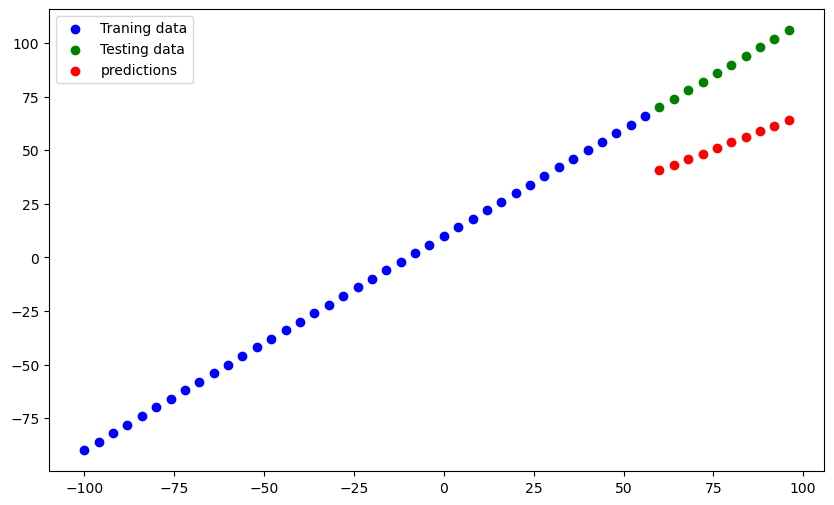

In [37]:
plot_predictions(prdeictions=y_pred1)

In [38]:
mae1 = Mae(y_test, (y_pred1))
mse1 = mse(y_test, (y_pred1))
mae1, mse1

(<tf.Tensor: shape=(), dtype=float32, numpy=35.67055>,
 <tf.Tensor: shape=(), dtype=float32, numpy=1288.2571>)

In [39]:
tf.random.set_seed(32)
model2 = tf.keras.Sequential([
    tf.keras.layers.Dense(10, input_shape= ([1])),
    tf.keras.layers.Dense(1)
])

model2.compile(loss= tf.keras.losses.mae, 
               optimizer= tf.keras.optimizers.SGD(),
               metrics= ['mse'])
model2.fit(X_train, y_train, epochs = 120, verbose =0)

In [40]:
y_pred2= model2.predict(X_test)


1/1 [==============================] - 0s 51ms/step


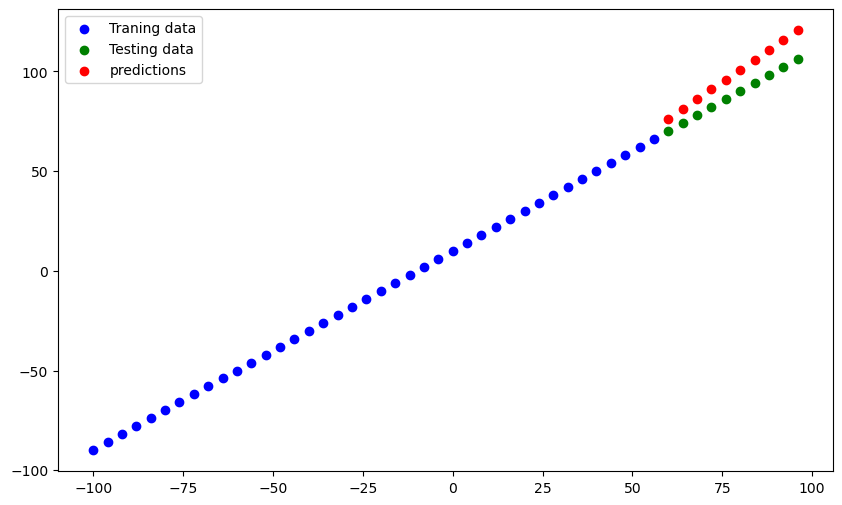

In [41]:
plot_predictions(prdeictions=y_pred2)


In [42]:
mae2 = Mae(y_test, (y_pred2))
mse2 = mse(y_test, (y_pred2))
mae2, mse2

(<tf.Tensor: shape=(), dtype=float32, numpy=10.403114>,
 <tf.Tensor: shape=(), dtype=float32, numpy=115.54751>)

In [43]:
tf.random.set_seed(32)
model3= tf.keras.Sequential([
    tf.keras.layers.Dense(10, input_shape= ([1])),
    tf.keras.layers.Dense(1)
])

model3.compile(loss= tf.keras.losses.mae, 
               optimizer= tf.keras.optimizers.SGD(),
               metrics= ['mae'])
model3.fit(X_train, y_train, epochs = 500, verbose = 1)

Epoch 1/500
2/2 [==============================] - 0s 8ms/step - loss: 38.4139 - mae: 38.4139
Epoch 2/500
2/2 [==============================] - 0s 3ms/step - loss: 21.9937 - mae: 21.9937
Epoch 3/500
2/2 [==============================] - 0s 5ms/step - loss: 29.0981 - mae: 29.0981
Epoch 4/500
2/2 [==============================] - 0s 3ms/step - loss: 9.1327 - mae: 9.1327
Epoch 5/500
2/2 [==============================] - 0s 6ms/step - loss: 11.2671 - mae: 11.2671
Epoch 6/500
2/2 [==============================] - 0s 3ms/step - loss: 30.9043 - mae: 30.9043
Epoch 7/500
2/2 [==============================] - 0s 5ms/step - loss: 14.1554 - mae: 14.1554
Epoch 8/500
2/2 [==============================] - 0s 4ms/step - loss: 10.0135 - mae: 10.0135
Epoch 9/500
2/2 [==============================] - 0s 4ms/step - loss: 11.5057 - mae: 11.5057
Epoch 10/500
2/2 [==============================] - 0s 3ms/step - loss: 17.6421 - mae: 17.6421
Epoch 11/500
2/2 [==============================] - 0s 3ms/st

In [44]:
y_pred3= model3.predict(X_test)


1/1 [==============================] - 0s 72ms/step


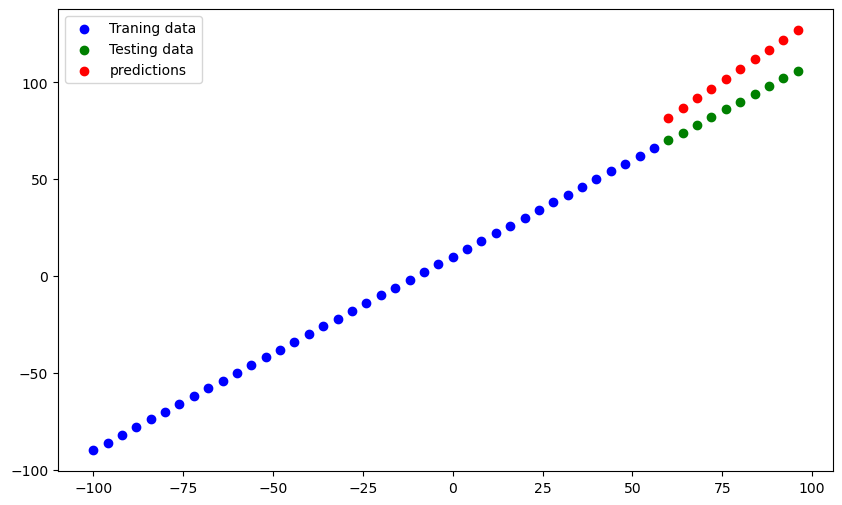

In [45]:
plot_predictions(prdeictions=y_pred3)
